##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
%pip install pandas
%pip install pyarrow
%pip install numpy
%pip install scikit-learn
%pip install imbalanced-learn
%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [4]:
# Can have as many cells as you want for code
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
filepath = "./data/catB_train.parquet" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

## Data Processing and KNN Imputation

In [5]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [6]:
#importing data into dataframe
df = pd.read_parquet("./data/catB_train.parquet")

# Convert target col to 0 or 1
df["f_purchase_lh"] = df["f_purchase_lh"].fillna(0)

# Identify numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"])

# Create a mask of non-NA values
non_na_mask = numeric_cols.notna()

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

#KNN imputation on non-NA values
imputed_non_na = imputer.fit_transform(numeric_cols[non_na_mask])
imputed_df = pd.DataFrame(imputed_non_na, columns=numeric_cols.columns, index=numeric_cols.index)

# Replace NA values with imputed values from nearest non-NA neighbors
for col in numeric_cols.columns:
    df[col].fillna(imputed_df[col], inplace=True)


# Display DataFrame after imputation
#print(df)

# Drop non-numeric cols
non_numeric_cols = df.select_dtypes(include=["string", "object"]).columns
df = df.drop(columns=non_numeric_cols)

y = df["f_purchase_lh"]
X = df.drop(columns=['f_purchase_lh'])

In [7]:
df.head()

,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,...,hlthclaim_cnt_success,recency_hlthclaim_success,hlthclaim_cnt_unsuccess,recency_hlthclaim_unsuccess,flg_hlthclaim_839f8a_ever,recency_hlthclaim_839f8a,flg_hlthclaim_14cb37_ever,recency_hlthclaim_14cb37,recency_giclaim,f_purchase_lh
19550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,29.666667,2.000000,29.333333,1.0,19.666667,1.0,29.333333,67.333333,0.0
4600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,45.000000,1.666667,49.333333,1.0,59.666667,1.0,49.333333,50.333333,0.0
13337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,58.000000,2.333333,47.666667,1.0,59.666667,1.0,47.666667,56.000000,0.0
15074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,59.000000,1.000000,36.000000,1.0,17.000000,1.0,50.333333,14.666667,0.0
19724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,64.333333,1.333333,74.666667,1.0,49.666667,1.0,64.333333,30.333333,0.0


In [8]:
df.shape

(17992, 90)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17992 entries, 19550 to 15795
Data columns (total 90 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   flg_substandard                    17992 non-null  float64
 1   flg_is_borderline_standard         17992 non-null  float64
 2   flg_is_revised_term                17992 non-null  float64
 3   flg_is_rental_flat                 17992 non-null  float64
 4   flg_has_health_claim               17992 non-null  float64
 5   flg_has_life_claim                 17992 non-null  float64
 6   flg_gi_claim                       17992 non-null  float64
 7   flg_is_proposal                    17992 non-null  float64
 8   flg_with_preauthorisation          17992 non-null  float64
 9   flg_is_returned_mail               17992 non-null  float64
 10  is_consent_to_mail                 17992 non-null  float64
 11  is_consent_to_email                17992 non-null  floa

<Axes: ylabel='Frequency'>

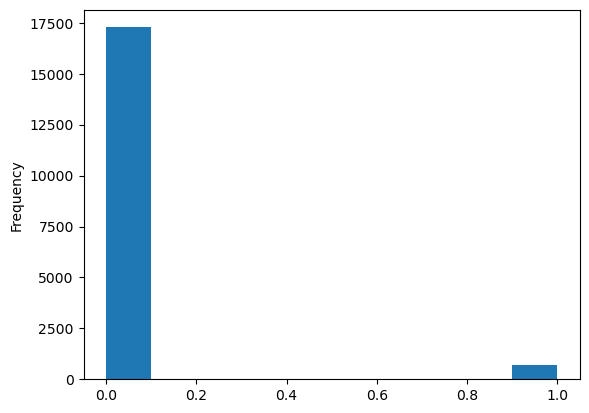

In [14]:
#Extreme inbalanced dataset 
df['f_purchase_lh'].plot.hist()

In [10]:
df.isna().sum()

flg_substandard               0
flg_is_borderline_standard    0
flg_is_revised_term           0
flg_is_rental_flat            0
flg_has_health_claim          0
                             ..
recency_hlthclaim_839f8a      0
flg_hlthclaim_14cb37_ever     0
recency_hlthclaim_14cb37      0
recency_giclaim               0
f_purchase_lh                 0
Length: 90, dtype: int64

### Scatterplots

In [17]:
# Split the DataFrame into two separate DataFrames based on the label values
#df_label_0 = df[df['f_purchase_lh'] == 0]
#df_label_1 = df[df['f_purchase_lh'] == 1]

# Create a scatter plot for each feature
#for feature in df.columns[:-1]: 
    #plt.figure(figsize=(8, 6))
    #plt.scatter(df_label_0[feature], df_label_0['f_purchase_lh'], label='Label 0', color='blue', marker='o')
    #plt.scatter(df_label_1[feature], df_label_1['f_purchase_lh'], label='Label 1', color='red', marker='x')
    #plt.xlabel(feature)
    #plt.ylabel('Label')
    #plt.title(f'Scatter Plot of {feature} vs Label')
    #plt.legend()
    #plt.show()

# Failure of scatterplots

We observe that scatter plots do not work well for our dataset. This can be explained by the following reasons

1. Most of our variables are qualitative variables.  

2. There are only 2 binary classes, which will only be represented by two points. 


## SMOTE to balance the dataset
### If you encounter ImportError, please run the following commands in the next 2 cells
#### This is a bug with the newest version of the packages and we solve it by downgrading them to earlier version

In [1]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0


In [2]:
!pip install scikit-learn==1.2.2
!pip install imblearn

  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [13]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X, y, test_size = 0.20, random_state = 42)

from imblearn.over_sampling import RandomOverSampler

def balancing(X,y,type):
       '''
       This function helps us to choose the type of resampling that we 
       want to do, functional abstraction, 1010 things :-)
       '''
       ros = RandomOverSampler(random_state=42)
       smote = SMOTE(random_state=42)
       if type == 'oversample':
              return ros.fit_resample(X, y)
       else:
              return smote.fit_resample(X,y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Balance the training data 
X_train , y_train = balancing(X_train , y_train, 'smote')

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [3]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''
    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!